In [26]:
import os
import re
import glob
import numpy as np
import pandas as pd
import clima_anom as ca
from netCDF4 import Dataset

import xarray as xr

import matplotlib.pyplot as plt

import matplotlib.cbook
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs

In [16]:
try:
    COM_NAME = os.environ['COMPUTERNAME']
except:
    os.environ['COMPUTERNAME'] = 'MACBOOK'
    COM_NAME = os.environ['COMPUTERNAME']

print(f'Computer Name: {COM_NAME}')

Computer Name: DELL_LAPTOP


In [17]:
if COM_NAME == 'DELL_LAPTOP':
    file_list = glob.glob('F:\\Data\\IMERG\\raw_month_NEB\\3IMERG*.nc')
elif COM_NAME == 'INPE_DELL':
    file_list = glob.glob('/mnt/Data/Data/IMERG/raw_month/3IMERG*.nc')
else:
    print(f'Computer {COM_NAME} not found!')

file_list = sorted(file_list)
len_list = len(file_list)
print(f'# files: {len_list}')

# files: 240


In [18]:
file_list[0],file_list[1],file_list[-2],file_list[-1]

('F:\\Data\\IMERG\\raw_month_NEB\\3IMERG.20010101-S000000-E235959.01.V06B.nc',
 'F:\\Data\\IMERG\\raw_month_NEB\\3IMERG.20010201-S000000-E235959.02.V06B.nc',
 'F:\\Data\\IMERG\\raw_month_NEB\\3IMERG.20201101-S000000-E235959.11.V06B.nc',
 'F:\\Data\\IMERG\\raw_month_NEB\\3IMERG.20201201-S000000-E235959.12.V06B.nc')

In [38]:
# def month_factor(yy,mm):

#     if mm == 1 or mm == 3 or mm == 5 or mm == 7 or mm == 8 or mm == 10 or mm == 12:
#         factor = 744
#     elif mm == 4 or mm == 6 or mm == 9 or mm == 11:
#         factor = 720
#     elif yy % 4 == 0 and yy % 100 != 0 or yy % 400 == 0:
#         factor = 696
#     else:
#         factor = 672

#     return factor

# salida = None
# for t in range(len_list):

#     data = ca.read_netcdf(file_list[t],0)

#     if salida is None:
#         lat = data['lat'].data
#         lon = data['lon'].data

#         nlat = len(lat)
#         nlon = len(lon)

#         salida = np.zeros([len_list,nlat,nlon])

#         lon2d, lat2d = np.meshgrid(lon, lat)

#     tim = data['time'].data
#     yy = tim[0].year
#     mm = tim[0].month

#     factor = month_factor(yy,mm)

#     # salida[t,:,:] = data['precipitation'][0,:,:].data.T*factor

# pre_mean = np.mean(salida,axis=0)

# file_name_out = "/mnt/Data/Data/IMERG/IMERG_2000_12_2021_02_1mo_01x01.nc"

# info = {'file': file_name_out,
#         'title': 'IMERG precipitation data IR + microwave + gauge 0.1x0.1', 
#         'year_start':2000,'month_start':12,'day_start':1,'hour_start':0,'minute_start':0,
#         'year_end':2021,'month_end':2,'day_end':28,'hour_end':23,'minute_end':55,
#         'time_frequency': 'monthly', 
#         'time_interval': 1,
#         'var_name': 'pre', 
#         'var_units': 'mm/month'}

# print()
# ca.create_netcdf(info,salida,lat,lon)

In [28]:
data_out = None
for nn in range(len_list):
    data = xr.open_dataset(file_list[nn])
    if data_out is None:
        data_out = data
        lat = data['lat'].values
        lon = data['lon'].values
    else:
        data_out = xr.concat([data_out, data], dim='time')

In [35]:
data_out.lat.attrs["units"] = "degrees_north"
data_out.lat.attrs["standard_name"] = "latitude"
data_out.lat.attrs["long_name"] = "latitude"
data_out.lat.attrs["axis"] = "y"

data_out.lon.attrs["units"] = "degrees_east"
data_out.lon.attrs["standard_name"] = "longitude"
data_out.lon.attrs["long_name"] = "longitude"
data_out.lon.attrs["axis"] = "x"

In [39]:
data_out

<xarray.Dataset>
Dimensions:        (time: 240, lon: 146, lat: 191)
Coordinates:
  * lat            (lat) float32 -19.05 -18.95 -18.85 ... -0.25 -0.15 -0.05
  * lon            (lon) float32 -48.95 -48.85 -48.75 ... -34.65 -34.55 -34.45
  * time           (time) object 2001-01-01 00:00:00 ... 2020-12-01 00:00:00
Data variables:
    precipitation  (time, lon, lat) float32 0.2261 0.2048 ... 0.01366 0.01436
Attributes:
    FileHeader:                      DOI=10.5067/GPM/IMERG/3B-MONTH/06;\nDOIa...
    FileInfo:                        DataFormatVersion=6a;\nTKCodeBuildVersio...
    Grid.GridHeader:                 BinMethod=ARITHMETIC_MEAN;\nRegistration...
    Grid.fullnamepath:               /Grid
    DODS_EXTRA.Unlimited_Dimension:  time
    history:                         2023-10-02 14:20:24 GMT Hyrax-1.16.3 htt...

In [37]:
dir_output = 'F:\\Data\\IMERG\\IMERG_1mo_2000_2020_NEB.nc'
print(f'Exporting to: {dir_output}')
data_out.to_netcdf(path=dir_output)

Exporting to: F:\Data\IMERG\IMERG_month_2000_2020_NEB.nc


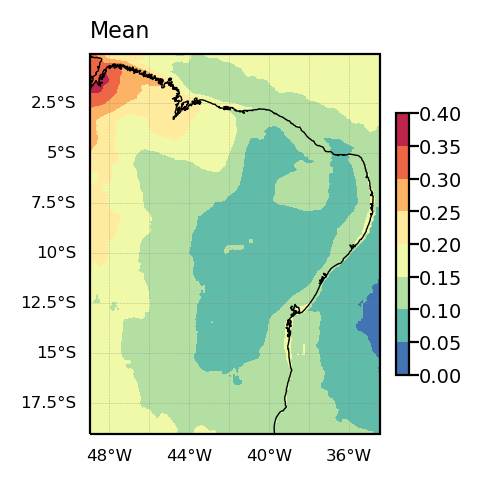

In [34]:
lon2d, lat2d = np.meshgrid(lon, lat)

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r
levels = None

fig = plt.figure(figsize=(7,5),dpi=200)
gs = gridspec.GridSpec(1,3)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
a1 = ax1.contourf(lon2d,lat2d,data_out['precipitation'].mean(dim='time').T,cmap=cmap,levels=levels)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
ax1.set_title('Mean',fontsize=8,loc='left')
cbar1 = plt.colorbar(a1,fraction=0.041)
cbar1.ax.tick_params(labelsize=7, pad=0.04)